### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

#### Custom CSS style

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>Cardiovascular Disease 💔</b></span><br/>
<span style='font-size: 1.5em'>Predict cardiovascular diseases</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>

<img src="./imgs/cardio.png" width=300/>

---



## Before starting this notebook
This jupyter notebook is designed for **experimental and teaching purposes**. <br/>
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for somes steps of the **machine learning pipeline** — see the [***Machine Learning Project Checklist by xavecoding***](https://github.com/xavecoding/IFSP-CMP-D2APR-2021.2/blob/main/cheat-sheets/machine-learning-project-checklist_by_xavecoding.pdf). <br/>
We tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.<br/>

For teaching purposes, some parts of the notebook may be _overcommented_. Moreover, to simulate a real development scenario, we will divide our solution and experiments into **"sprints"** in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...). <br/>
The **sprint goal** will be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that compiles and summarizes all sprints — the target problem, solutions, and findings — should be created later.

#### Conventions

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals
- Frame the problem
- Get the data
- Data cleaning
---

### 0. Imports and default settings for plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 🔲 1. Frame the Problem

### 📄 1.1. Context
    
**Cardiovascular disease (CVD)** is the number one cause of death worldwide [1]. CVDs can refer to some conditions [2]:

#### **1. Heart disease**
Heart and blood vessel disease (also called heart disease) includes numerous problems, for example, a disorder of the blood vessels supplying the heart muscle.
when the inner walls of arteries become narrower due
to a buildup of plaque (usually caused by a diet high
in fat, cigarette smoking, diabetes or hypertension). 

#### **2. Heart attack**
It occurs when the blood flow to a part of the heart is blocked by a blood clot. If this clot cuts off the blood flow completely, the part of the heart muscle supplied by that artery begins to die.

#### **3. Stroke**
An _ischemic stroke_ (the most common type of stroke) occurs when a blood vessel that feeds the brain gets blocked, usually from a blood clot.<br/>
A _hemorrhagic stroke_ occurs when a blood vessel within the brain bursts. This is most often caused by uncontrolled hypertension (**high blood pressure**).

#### **4. Heart failure**
The heart is not pumping blood as well as it should. It keeps working, but the body does not get all the blood and oxygen it needs.

#### **5. Arrhythmia**
Arrhythmia refers to an abnormal heart rhythm. There are various types of arrhythmias. The heart can beat too slow, too fast or irregularly.

#### **6. Heart valve problems**
When heart valves don’t open enough to allow the blood to flow through as it should, a condition called stenosis results. When the heart valves don’t close properly and thus allow blood to leak through, it’s called regurgitation. If the valve leaflets bulge or prolapse back into the upper chamber, it’s a condition called prolapse. <br/> <br/>

According to the World Health Organization (WHO) [1, 3], CDVs are responsible for an estimated _17.9 million deaths in 2019_, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke. Over three quarters of CVD deaths take place in low- and middle-income countries. Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as **tobacco use**, **unhealthy diet** and **_obesity_**, **physical inactivity** and **harmful use of alcohol**.

It is important **to detect cardiovascular** disease _as early as possible_ so that management with counselling and medicines can begin. <br/><br/>

**References:** <br/>
[1] World Health Organization, 2021 - https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)#:~:text=Cardiovascular%20diseases%20(CVDs)%20are%20the,%2D%20and%20middle%2Dincome%20countries (accessed on 2021-10-12).<br/>
[2] American Heart Association, 2021 - https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease (accessed on 2021-10-12)<br/>
[3] Kaptoge, Stephen, et al. "World Health Organization cardiovascular disease risk charts: revised models to estimate risk in 21 global regions." The Lancet Global Health 7.10 (2019): e1332-e1345.


### 🧠 1.2. Challenge
<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>An hypothetical business problem proposed by the blog: <a href="https://sejaumdatascientist.com/projeto-de-data-science-diagnostico-precoce-de-doencas-cardiovasculares">Seja um Data Scientist</a>.</td>
</tr>
</table><br/><br/><br/>

Cadio Catch Diseases is a company that specializes in **detecting early-stage heart disease**. Its business model relies on offering _early diagnosis of cardiovascular diseases_.

#### **Baseline:**
Currently, the provided diagnosis is made _manually_ by a team of specialists. Its current **accuracy** varies between **55% and 65%**, due to the complexity of the diagnosis and the fatigue of the physicians who take turns to minimize the risks. <br/>
The **cost of each diagnosis**, including equipment and analysts' payroll, **is around R\\$ 1,000.00**.

The cost that a patient pays for a diagnosis varies according to the accuracy achieved by the team of specialists according to the following rules:

| Accuracy | Cost | Example |
|----------|------|---------|
| ≤ 50%    | R\\$ 0.00| -- |
| > 50%    | R\\$ 500.00 <br/> for every 5% additional accuracy  | **Accuracy** = 65%, <br/>**Cost** = R\\$ 1,500.00 |

The patient pays R\\$ 500.00 for each 5% accuracy above 50%. <br/>
For example, the diagnosis costs R\\$ 500.00 for an **accuracy of 55%**, R\\$ 1000.00 for an **accuracy of 60%**  and so on. <br/>
The patient _pays nothing_ for a diagnosis whose accuracy is _less than or equal to 50%_.

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>The <b>variation in accuracy</b> given by the current solution/baseline (physicians' diagnosis) make the company either have a <i>profitable operation</i> — revenue greater than the cost — or an <i>operation with a loss</i> — revenue less than the cost.</td>
</tr>
<tr>
    <td></td>
    <td>This <i>instability</i> during diagnosis hinders the company to have predict its cashflow.</td>
</tr>
</table><br/><br/><br/>

#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict cardiovascular diseases.** <br/>
This solution provided _more accurated_ and _stable diagnoses_ than the current solution.

#### **Solution Planning:**
- **Classification problem**
- Metrics:
    - Accuracy
    - Precision vs Recall
    - Sensitivity vs Specificity
    - ROC curve
    - AUC
    - F1 score
- Data sources:
    - [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data
We considered the [**Cardiovascular Disease dataset** from Kaggle.](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data
We previously downloaded the dataset from [from Kaggle.](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) <br/>
The dataset consists of a _single_ CSV file called _cardio\_train.csv_. From this name, we suppose that there is a separated _testing set_ in somewhere to assess the final accuracies. However, we could not find it anywhere. 

### 2.2. Load the Data

In [3]:
import pandas as pd

cardio = pd.read_csv('./datasets/cardio_train.csv', sep=';')

In [4]:
cardio.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

### 2.3. Take a quick look at the data structure
Let's take a look at our data in order to support us during _data cleaning_. <br/>
In this step, we are interested in _getting an overview about our data_ (e.g., how the features are distributed) as well as _finding inconsistencies_ in our data, such as outliers/noise.

In [5]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


According to the dataset's website, it contains 3 types of input features:
- **Objective:** factual information;
- **Examination:** results of medical examination;
- **Subjective:** information given by the patient.


|Feature                                      |Type               |Feature Name|Data Type|
|---------------------------------------------|-------------------|------------|------------------------------------------------|
|Age                                          |Objective Feature  |age         |int (days)                                      |
|Height                                       |Objective Feature  |height      |int (cm)                                        |
|Weight                                       |Objective Feature  |weight      |float (kg)                                      |
|Gender                                       |Objective Feature  |gender      |1 - women, 2 - men                              |
|Systolic blood pressure                      |Examination Feature|ap_hi       |int                                             |
|Diastolic blood pressure                     |Examination Feature|ap_lo       |int                                             |
|Cholesterol                                  |Examination Feature|cholesterol |1: normal, 2: above normal, 3: well above normal|
|Glucose                                      |Examination Feature|gluc        |1: normal, 2: above normal, 3: well above normal|
|Smoking                                      |Subjective Feature |smoke       |binary                                          |
|Alcohol intake                               |Subjective Feature |alco        |binary                                          |
|Physical activity                            |Subjective Feature |active      |binary                                          |
|Presence or absence of cardiovascular disease|Target Variable    |cardio      |binary                                          |

For binary data:
- 0: no
- 1: yes

The column _id_ is the patient's identifier number and does not contribute to our solution or analysis.

All of the dataset values were collected at the moment of medical examination.

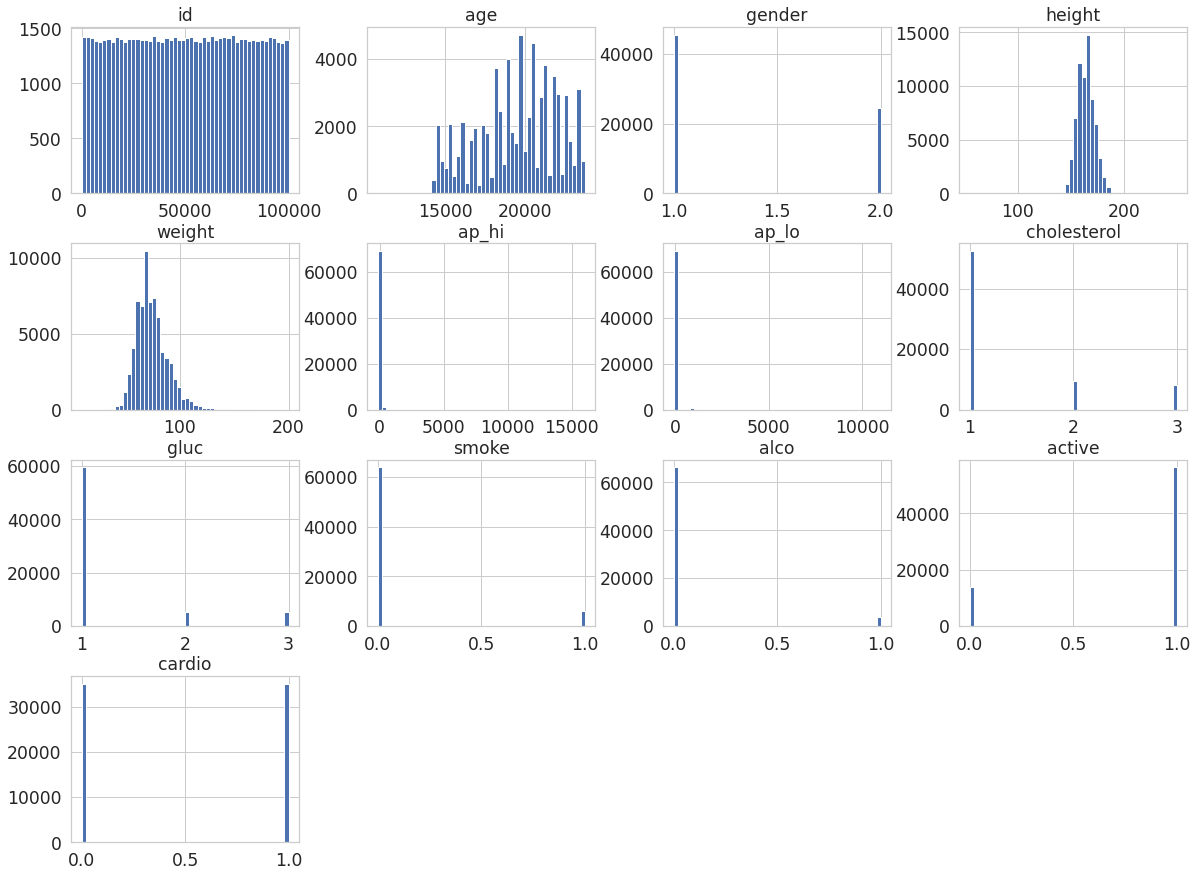

In [6]:
# plot a histogram for each numeric attibute from the dataframe
cardio.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

#### **Pandas Profiling**
Generates profile reports from a pandas DataFrame.
https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

**Installation** <br/>
pip install pandas-profiling[notebook]

In [7]:
from pandas_profiling import ProfileReport

In [8]:
cardio.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Overview**
- Number of variables: 13
- Number of observations: 70000
- Missing cells: 0
- Duplicate rows: 0

**Variable types**
- Numeric: 6
- Categorical: 7

**Variables** <br/>
- 🧹 `id` is useless for our analysis and ML solutions
- `age` is expressed in **days**, so it is _hard_ to analyze it.
    - 🥣 We should convert it to **years**
    - The young people in our dataset is 10798 days old (29.58 years old)
    - The oldest people in our dataset is 23713 days old (64.93 years old)
- The _shortest 5 people_ is around 60 cm tall.
    - 🧹 This seems to be **noise** since this is the close height of a newboarn.
    - Or it is a cluster/group of [the smallest people (dwarfs) in the world](https://en.wikipedia.org/wiki/List_of_the_verified_shortest_people), which seems unlikely.
- The _tallest person_ is 250 cm tall.
    - 🧹 This seems to be **noise**, because it is close to the height of the tallest people in the world.
    - Of course, we could have these people in our data. But since its probability is too low, we'd better consider him/her/them as outliers.
- 🧹 The _thinnest person_ weighs 10 kg ==> the weight of a toddler (noise)
- The _most obese person_ weighs 200 kg
    - Although this weight is uncommon for most people (so, an _outlier_), it does not seem to be noise.
    - It seems that indeed happens for the considered problem ==> so, let's keep it/them.
- There are more men (65%) than women (35%)
- 🔎 `genre` is highly correlated with `height` and `smoke`
- 🔎🧹 The systolic blood pressure `ap_hi` have a _strange range_ with _suspicious extreme values_ (probably, noise)
    - Negative and very high values
- 🔎🧹 The same happens with the diastolic blood pressure `ap_lo`
- 🔎 It is highly correlated with the diastolic blood pressure `ap_lo` 
- 🔎 `cholesterol` is categorical and most people/samples have a normal cholesterol (74.8%)
- 🔎 `cholesterol` is highly correlated with `gluc` (glucose)
- `gluc` is categorical and most people/samples have a normal cholesterol (85%)
- Most people do not smoke (91.2%)
- `smoke` is highly correlated with `gender` and `alco` (alcohol intake?)
- Most people do not intake alcohol (94.6%)
- Most people are physically active (80.4%)
- The target classes `cardio` (has CVD or not) are balanced (~ 50%)
    - So we do not have to deal with class imbalance here =D

- The only variables somehow correlated with `cardio` are `age`, `weight`, and `cholesterol`.

Note that _Smoking_, _Alcohol intake_, and _Physical activity_ are **subject**. <br/>
For me, it is strange to have just a few people that intake alcohol, for example. <br/>
But, that's the data we have. Just don't forget: "Everybody lies" (House, MD)



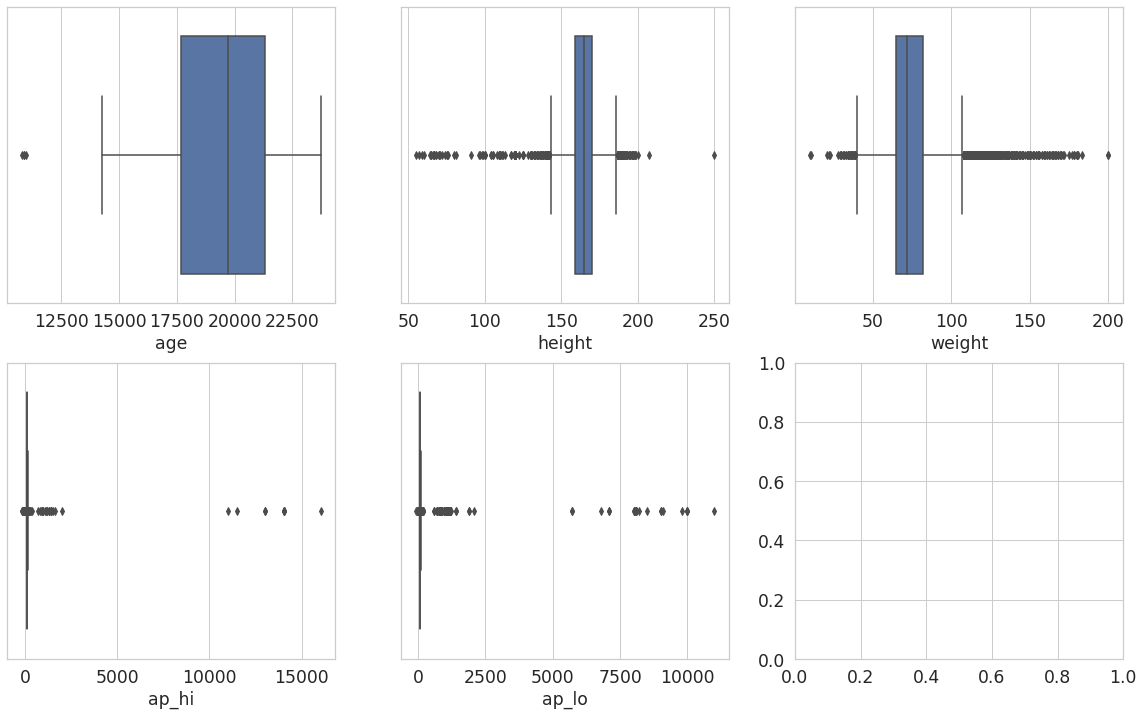

In [9]:
# let's take a look at some boxplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

num_variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for i, var in enumerate(num_variables):
    row = i // 3
    col = i % 3
    sns.boxplot(data=cardio, x=var, ax=axes[row, col])


## 🧹 3. Data Cleaning

### 3.1. Missing values

We do not have missing values in our data.

### 3.3. Duplicated rows

We do not have duplicated rows/samples in our data.

### 3.3. Removing useless features/columns/variables
⚠️ **Be careful** <br/>
When _removing features/columns_ of our data, we are consider a **new standard input/format** for it. <br/>
All our preprocessing, training, and models will consider this _new data format_. <br/>

However, the **upcoming data in our _system in production_** keeps considering the **initial standard input/format**, i.e., that including the removed features/columns. <br/>
In order for our model to work properly in _production_, we should include an additional step in our _preprocessing pipeline_ that **_filters or remove these columns_**. The simplest way is to inform the considered columns for the sklearn `ColumnTransformer` that will filter these columns during your pipeline.

In [10]:
# removing the column `id`
cardio_clean = cardio.drop(columns='id')

In [11]:
cardio_clean.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [12]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


### 3.4. Converting values/columns

The column `age` is expressed in _days_ which hinders the analysis. We should convert it to _years_ to make our analysis and understanding about the data easier. <br/>
However, we will create a **transformer** for that later. <br/>

💡 What we could do is to create a _temporary column_ `age_years` with the age in years **during our _exploratory data analysis_** just to make this feature easier to interpret.

### 3.5. Removing outliers

#### **3.4.1. Height and Weight**

In [13]:
# converting age in years (temporary column)
cardio_clean['age_years'] = cardio_clean['age'] / 365

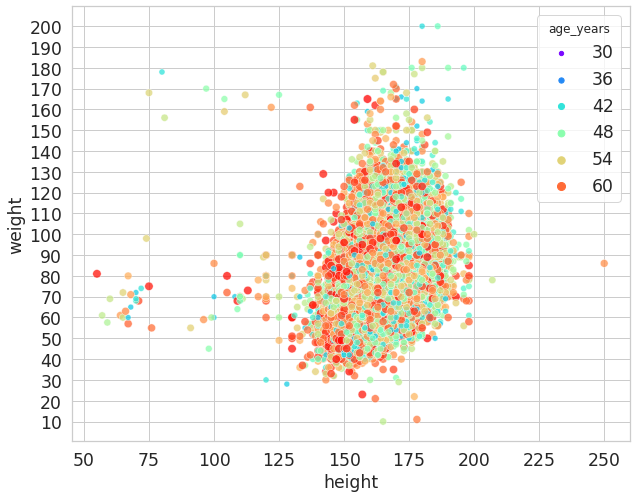

In [14]:
# checking the relationship between age and height
plt.figure(figsize=(10, 8))

sns.scatterplot(data=cardio_clean, x='height', y='weight', hue='age_years', size='age_years', palette='rainbow', alpha=0.75)
plt.yticks(np.arange(cardio_clean['weight'].min(), cardio_clean['weight'].max() + 0.1, 10))
display()

There are outliers in our data set:
- Points up to 77 cm and 100 kg (this might be dwarfs)
- Points up to 35 kg and heights ranging from 150 cm onwards
- Points up to 125 cm and weights from 150 kg onwards
- Point at 250 cm and ~90 kg

By researching about [_dwarfism_](https://www.mayoclinic.org/diseases-conditions/dwarfism/symptoms-causes/syc-20371969#:~:text=Dwarfism%20is%20short%20stature%20that,4%20feet%20(122%20cm).), we can see that the average **adult height** among people with _dwarfism_ is 122 cm. <br/>
[The smallest people (dwarfs) in the world](https://en.wikipedia.org/wiki/List_of_the_verified_shortest_people), like the ones in our data, which seems unlikely. <br/>

Since our data has only **adults**, we decided to remove those with height less than 122 cm.

In [15]:
# removing outliers based on weight and height 
cardio_clean = cardio_clean.drop(columns='age_years')

In [16]:
# getting the mask for outliers and non-outliers
outlier_mask = (cardio_clean['height'] < 122) | \
               (cardio_clean['height'] > 225) | \
               ((cardio_clean['height'] >= 150) & (cardio_clean['weight'] < 35)) | \
               ((cardio_clean['height'] <= 125) & (cardio_clean['weight'] >= 150))

no_outlier_mask = ~outlier_mask

In [17]:
cardio_clean = cardio_clean[no_outlier_mask]

In [18]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69900 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69900 non-null  int64  
 1   gender       69900 non-null  int64  
 2   height       69900 non-null  int64  
 3   weight       69900 non-null  float64
 4   ap_hi        69900 non-null  int64  
 5   ap_lo        69900 non-null  int64  
 6   cholesterol  69900 non-null  int64  
 7   gluc         69900 non-null  int64  
 8   smoke        69900 non-null  int64  
 9   alco         69900 non-null  int64  
 10  active       69900 non-null  int64  
 11  cardio       69900 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


#### **3.4.2. Systolic (`ap_hi`) and Distolic Blood Pressure (`ap_lo`)**

<AxesSubplot:xlabel='ap_lo', ylabel='ap_hi'>

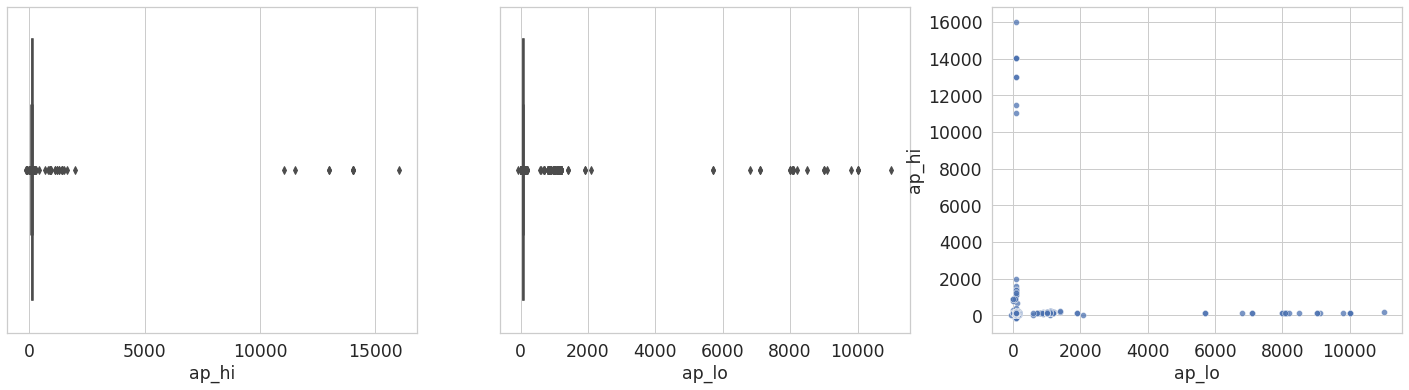

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.boxplot(data=cardio_clean, x='ap_hi', ax=axes[0])
sns.boxplot(data=cardio_clean, x='ap_lo', ax=axes[1])
sns.scatterplot(data=cardio_clean, x='ap_lo', y='ap_hi', alpha=0.75)

<br/>

As a first idea, we can use the **IQR method** for _outlier detection_.

In [20]:
# systolic blood pressure (ap_hi)
Q1_ap_hi = cardio_clean['ap_hi'].quantile(0.25)
Q3_ap_hi = cardio_clean['ap_hi'].quantile(0.75)
IQR_ap_hi = Q3_ap_hi - Q1_ap_hi

lower_bound_ap_hi = Q1_ap_hi - 1.5 * IQR_ap_hi
upper_bound_ap_hi = Q3_ap_hi + 1.5 * IQR_ap_hi

print(f'**** Systolic Blood Pressure (ap_hi) ****')
print(f'Min: {cardio_clean["ap_hi"].min()}')
print(f'Max: {cardio_clean["ap_hi"].max()}')
print(f'IQR: {IQR_ap_hi}')
print(f'Interval: [{lower_bound_ap_hi}, {upper_bound_ap_hi}]')

**** Systolic Blood Pressure (ap_hi) ****
Min: -150
Max: 16020
IQR: 20.0
Interval: [90.0, 170.0]


In [21]:
# systolic blood pressure (ap_hi)
Q1_ap_lo = cardio_clean['ap_lo'].quantile(0.25)
Q3_ap_lo = cardio_clean['ap_lo'].quantile(0.75)
IQR_ap_lo = Q3_ap_lo - Q1_ap_lo

lower_bound_ap_lo = Q1_ap_lo - 1.5 * IQR_ap_lo
upper_bound_ap_lo = Q3_ap_lo + 1.5 * IQR_ap_lo

print(f'**** Diastolic Blood Pressure (ap_lo) ****')
print(f'Min: {cardio_clean["ap_lo"].min()}')
print(f'Max: {cardio_clean["ap_lo"].max()}')
print(f'IQR: {IQR_ap_lo}')
print(f'Interval: [{lower_bound_ap_lo}, {upper_bound_ap_lo}]')

**** Diastolic Blood Pressure (ap_lo) ****
Min: -70
Max: 11000
IQR: 10.0
Interval: [65.0, 105.0]


<br/>

Any sample _out of these intervals_ is considered an _outlier_. <br/>

Ok, but there is a **medical consensus about boundaries** for the _systolic and diastolic blood pressure_.

<img src="./imgs/blood_pressure_stages.png" width=600/>

https://morelifehealth.com/articles/blood-pressure

<img src="./imgs/hypotension.png" width=400/>

https://pharmeasy.in/blog/low-blood-pressure-precautions-and-ways-to-manage-it/

<br/>

By analyzing these indicators and considering that CVDs are more associated with _high blood pressures_, let's consider the following **_intervals_ for _non-outlier_ systolic and diastolic blood pressures**. 

- **Systolic blood pressure (`ap_hi`)**: [90, 210]
- **Diastolic blood pressure (`ap_lo`)**: [60, 150]

In [22]:
# systolic and diastolic outlier mask
outlier_mask = (cardio_clean['ap_hi'] < 90) | \
               (cardio_clean['ap_hi'] > 210) | \
               (cardio_clean['ap_lo'] < 60) | \
               (cardio_clean['ap_lo'] > 150)

no_outlier_mask = ~outlier_mask

In [23]:
cardio_clean = cardio_clean[no_outlier_mask]

In [24]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68400 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68400 non-null  int64  
 1   gender       68400 non-null  int64  
 2   height       68400 non-null  int64  
 3   weight       68400 non-null  float64
 4   ap_hi        68400 non-null  int64  
 5   ap_lo        68400 non-null  int64  
 6   cholesterol  68400 non-null  int64  
 7   gluc         68400 non-null  int64  
 8   smoke        68400 non-null  int64  
 9   alco         68400 non-null  int64  
 10  active       68400 non-null  int64  
 11  cardio       68400 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


<AxesSubplot:xlabel='ap_lo', ylabel='ap_hi'>

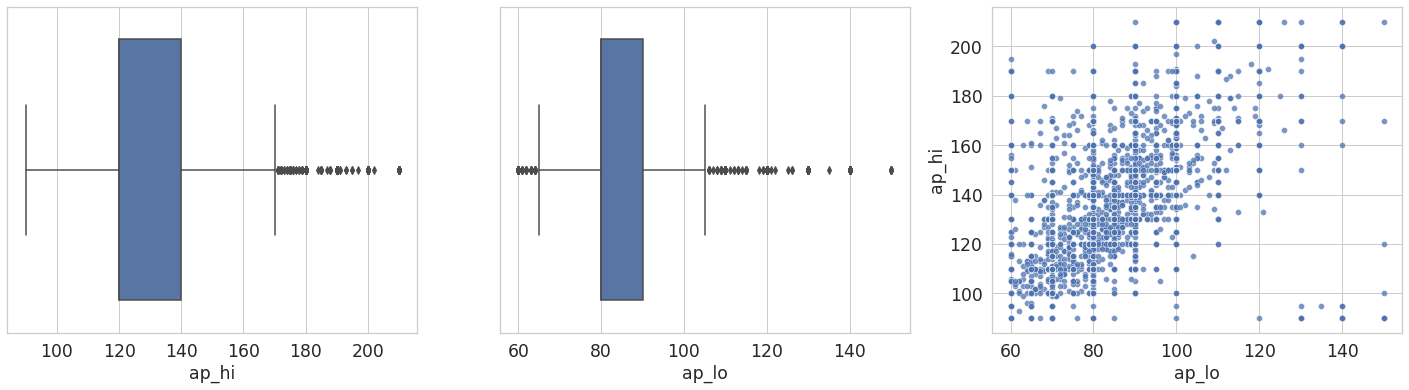

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.boxplot(data=cardio_clean, x='ap_hi', ax=axes[0])
sns.boxplot(data=cardio_clean, x='ap_lo', ax=axes[1])
sns.scatterplot(data=cardio_clean, x='ap_lo', y='ap_hi', alpha=0.75)

In [26]:
removed_outlier_ratio = (1 - (cardio_clean.shape[0] / cardio.shape[0])) * 100

print(f'Number of outliers removed from our data: {cardio.shape[0] - cardio_clean.shape[0]}')
print(f'Ratio of removed outliers: {round(removed_outlier_ratio, 2)}%')

Number of outliers removed from our data: 1600
Ratio of removed outliers: 2.29%


Therefore, we have removed _1600 outliers_, which corresponds to _2.29_% of our data. 

### 3.5. Create a Test Set

In [27]:
# stratified sampling
from sklearn.model_selection import train_test_split

cardio_train, cardio_test = train_test_split(cardio_clean, test_size=0.2, stratify=cardio_clean['cardio'], random_state=42)

In [28]:
print(f'**** Training set ****\n')
print(f'{cardio_train.info()}')
print(f'{cardio_train.shape}')

**** Training set ****

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54720 entries, 54047 to 6591
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          54720 non-null  int64  
 1   gender       54720 non-null  int64  
 2   height       54720 non-null  int64  
 3   weight       54720 non-null  float64
 4   ap_hi        54720 non-null  int64  
 5   ap_lo        54720 non-null  int64  
 6   cholesterol  54720 non-null  int64  
 7   gluc         54720 non-null  int64  
 8   smoke        54720 non-null  int64  
 9   alco         54720 non-null  int64  
 10  active       54720 non-null  int64  
 11  cardio       54720 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.4 MB
None
(54720, 12)


In [29]:
cardio_train.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
54047  21875       2     171    74.0    120     80            1     1      0   
63190  15302       1     162    66.0    110     80            1     1      0   
18941  18079       1     166    69.0    120     80            1     2      0   
48433  21680       1     169    65.0    120     80            1     1      0   
61187  14368       1     155    80.0    120     80            1     1      0   

       alco  active  cardio  
54047     0       0       1  
63190     0       1       0  
18941     0       1       0  
48433     0       0       1  
61187     0       1       0

In [30]:
print(f'**** Testing set ****\n')
print(f'{cardio_test.info()}')
print(f'{cardio_test.shape}')

**** Testing set ****

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13680 entries, 1520 to 25478
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          13680 non-null  int64  
 1   gender       13680 non-null  int64  
 2   height       13680 non-null  int64  
 3   weight       13680 non-null  float64
 4   ap_hi        13680 non-null  int64  
 5   ap_lo        13680 non-null  int64  
 6   cholesterol  13680 non-null  int64  
 7   gluc         13680 non-null  int64  
 8   smoke        13680 non-null  int64  
 9   alco         13680 non-null  int64  
 10  active       13680 non-null  int64  
 11  cardio       13680 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.4 MB
None
(13680, 12)


In [31]:
cardio_test.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
1520   18131       1     167    67.0    150    100            1     1      0   
32493  18075       2     162    67.0    120     80            1     1      0   
52531  21275       1     165    63.0    140     80            1     1      0   
2997   14583       1     168    61.0    140     90            1     1      0   
55091  20393       1     161    65.0    120     70            1     1      0   

       alco  active  cardio  
1520      0       1       1  
32493     1       1       0  
52531     0       0       1  
2997      0       0       1  
55091     0       0       1

#### **Saving the datasets**

In [32]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
cardio_train.to_csv('./datasets/cardio_clean_train.csv', index=False)
cardio_test.to_csv('./datasets/cardio_clean_test.csv', index=False)

## 📊 4. Explore the Data
Our simple data exploration in Section 2.3. gave us some insights to explore our data. <br/>
Let's explore it deeper.

## 4.1. Correlation

In [33]:
cardio_train.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

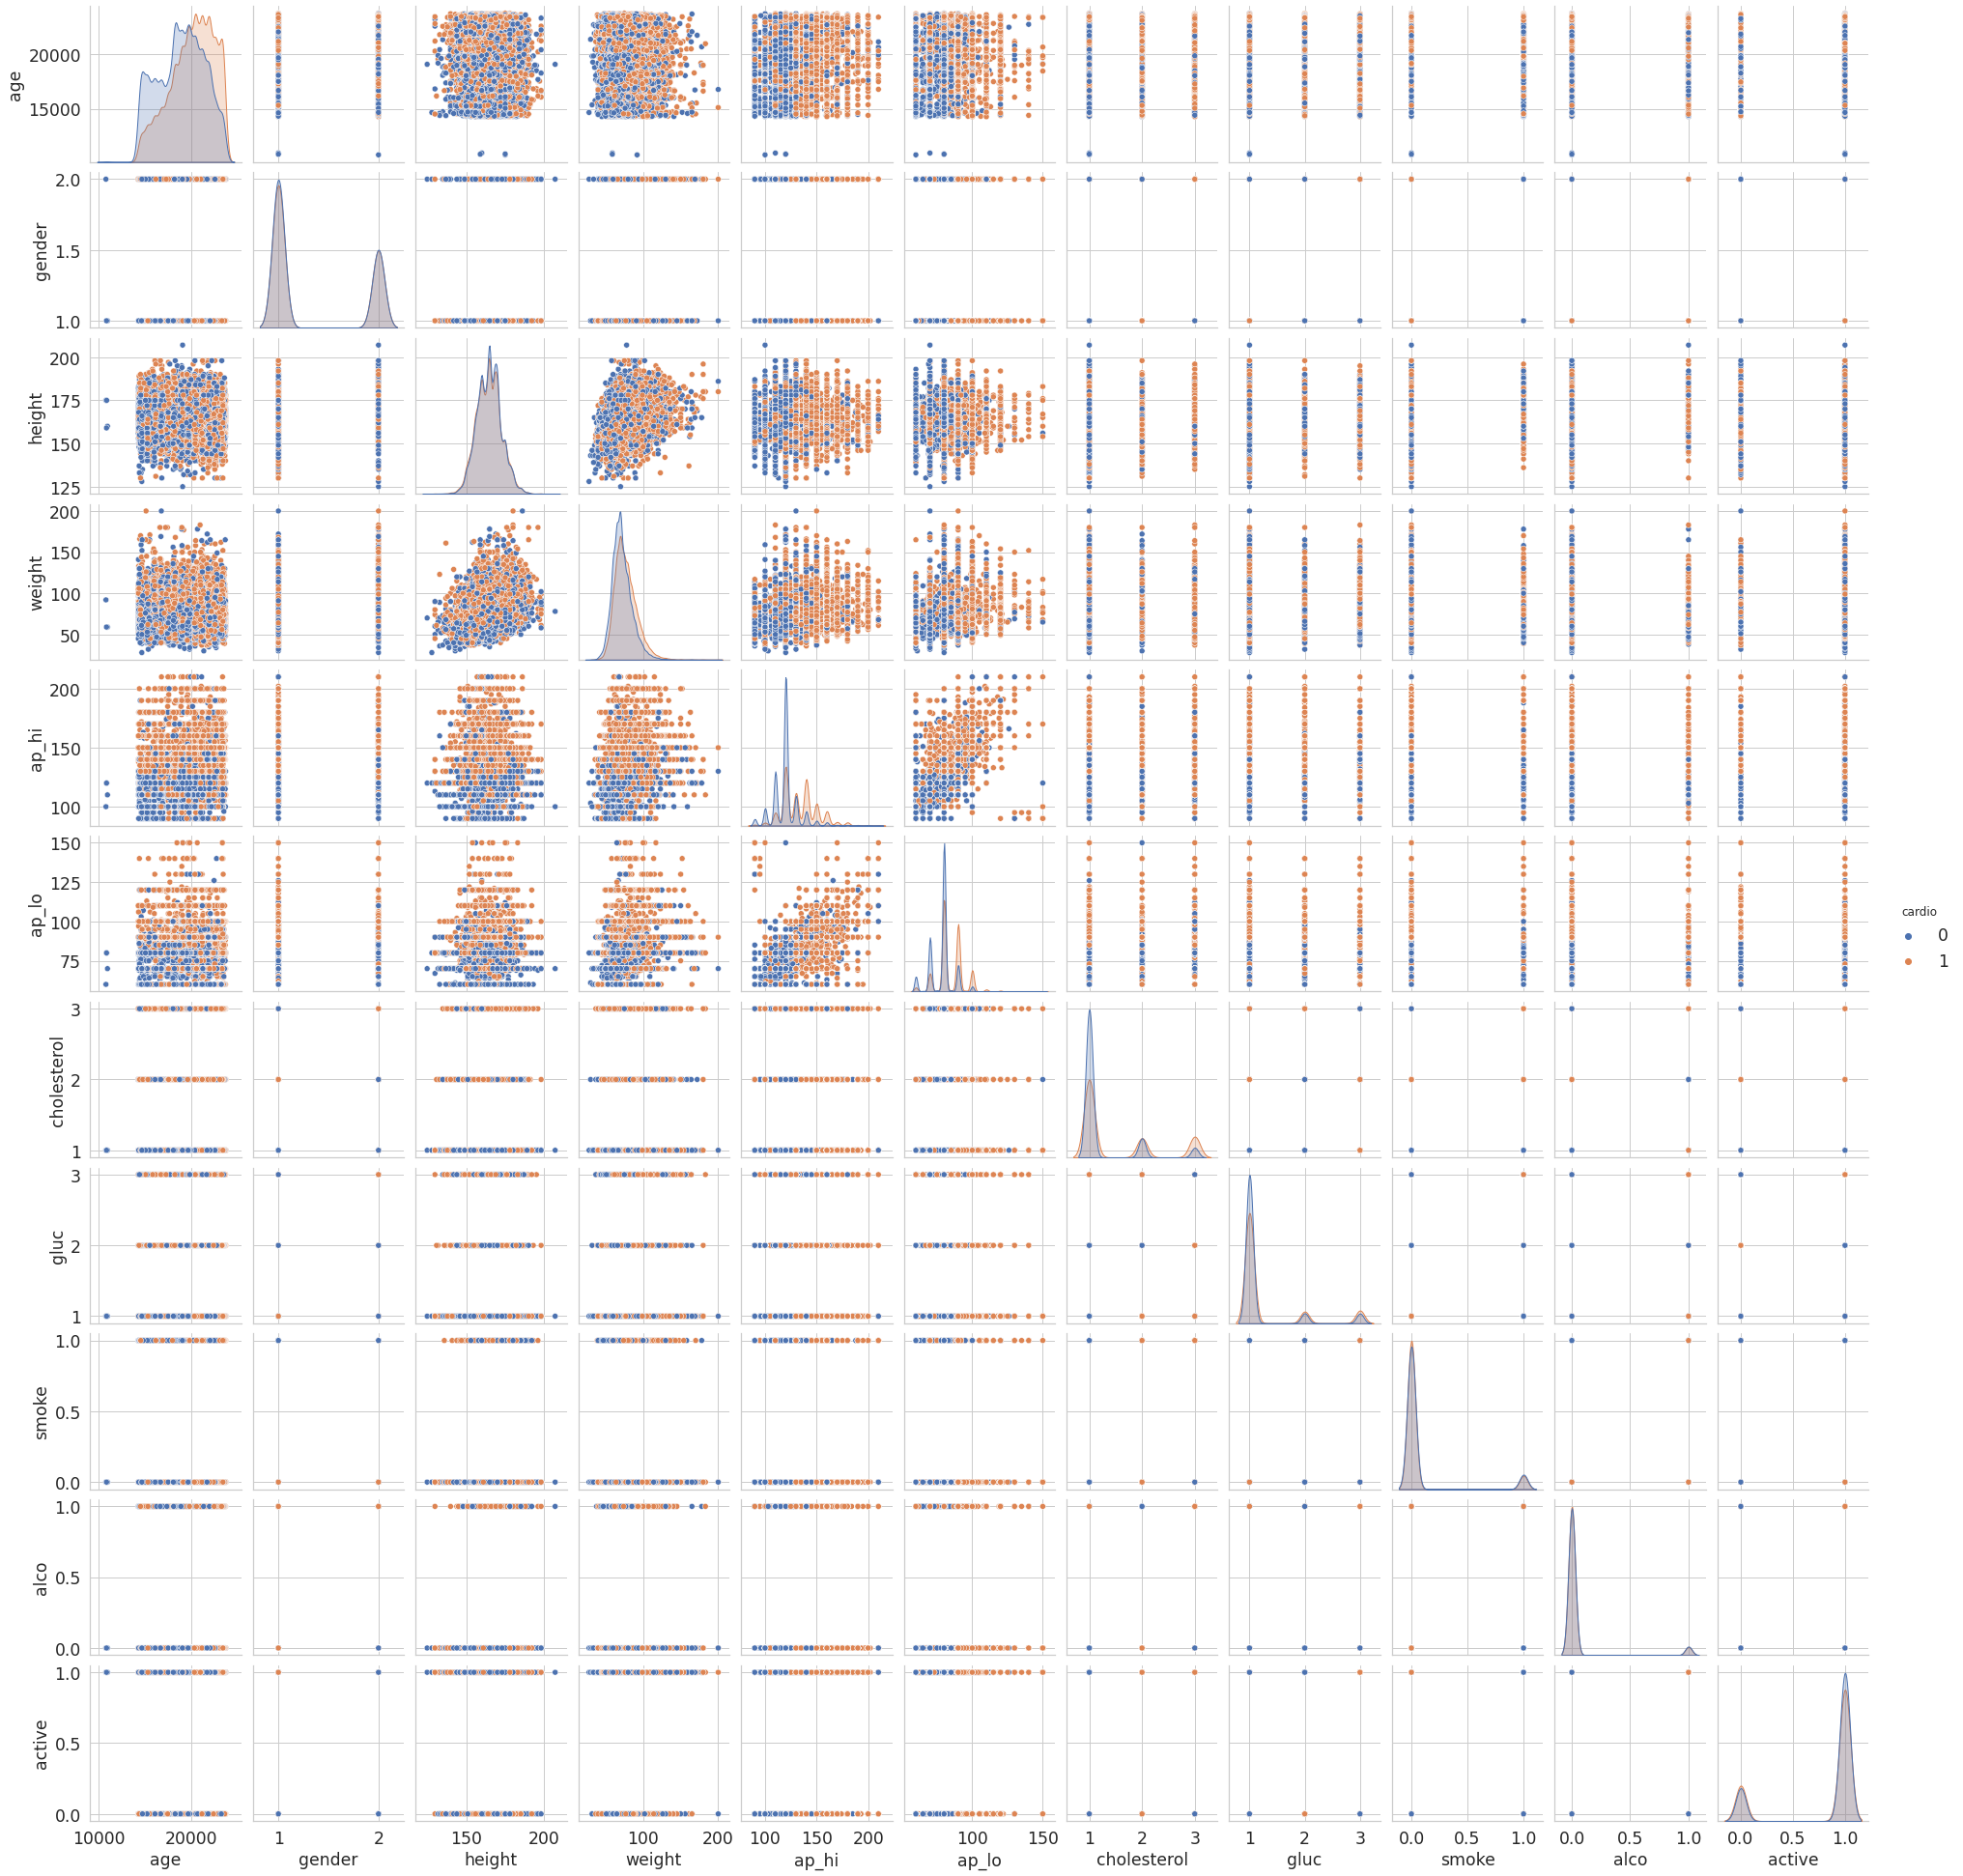

In [36]:
sns.pairplot(data=cardio_train, hue='cardio')

<br/>

Just looking at the correlation between pair of features colored by the target classes, we can see that the combination of a given **blood pressure feature** (`ap_hi` or `ap_lo`) with another feature (e.g., `gender`, `weight`, `active`) give us, apparently, a **certain separability** between the classes.

E.g., see the plot of `ap_lo` vs `active`.

<AxesSubplot:xlabel='ap_lo', ylabel='active'>

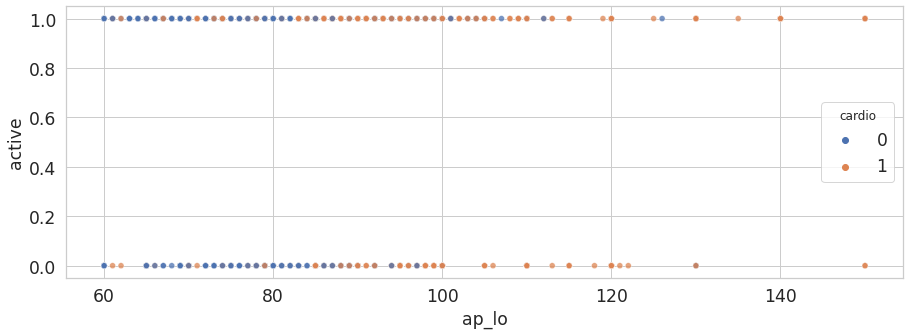

In [41]:
# ap_lo vs active
sns.scatterplot(data=cardio_train, x='ap_lo', y='active', hue='cardio', alpha=0.75)

<AxesSubplot:xlabel='ap_hi', ylabel='ap_lo'>

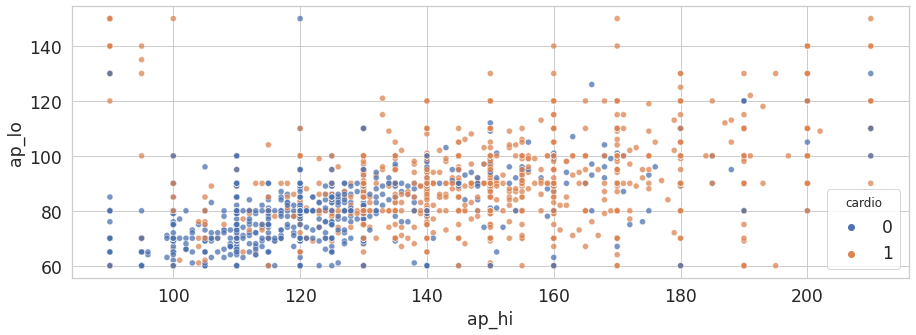

In [42]:
# ap_hi vs ap_lo
sns.scatterplot(data=cardio_train, x='ap_hi', y='ap_lo', hue='cardio', alpha=0.75)

### Exercise

Formulate a list of hypothesis and perform an Exploratory Data Analysis (EDA) <br/>
As inspiration, we refer to this [EDA performed on the same dataset](https://garagemdosdados.com.br/?p=191).